In [1]:
import numpy as np
np.set_printoptions(precision=3)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, "savefig.dpi":300})
sns.set_context("notebook")
sns.set_style("ticks")

import scipy
import scipy.stats as st
import urllib.request
import os

def download(
    url : str,
    local_filename : str = None
):
    """Download a file from a url.
    
    Arguments
    url            -- The url we want to download.
    local_filename -- The filemame to write on. If not
                      specified 
    """
    if local_filename is None:
        local_filename = os.path.basename(url)
    urllib.request.urlretrieve(url, local_filename)

(logistic_regression_with_one_variable)=
# Logistic regression with one variable (High melting explosives)


[High Melting Explosives](https://en.wikipedia.org/wiki/HMX) (HMX) have applications as detonators of nuclear weapons and as solid rocket propellants.
We will use logistic regression to build the probability that a specific HMX block explodes when dropped from a given height.
To this end, we will use data from a 1987 Los Alamos Report
(L. Smith, “Los Alamos National Laboratory explosives orientation course: Sensitivity and sensitivity tests to impact, friction, spark and shock,” Los Alamos National Lab, NM (USA), Tech. Rep., 1987).
Let's download the raw data and load them.
We will use the [Python Data Analysis Library](https://pandas.pydata.org/):

In [2]:
# TODO: change url
url = 'https://raw.githubusercontent.com/PurdueMechanicalEngineering/me-297-intro-to-data-science/master/data/hmx_data.csv'
download(url)

import pandas as pd
data = pd.read_csv('hmx_data.csv')

Each row of the data is a different experiment.
There are two columns:

+ First column is **Height**: From what height (in cm) was the specimen dropped from.
+ Second column is **Result**: Did the specimen explode (E) or not (N)?

Here is how to see the raw data:

In [3]:
data

,Height,Result
0,40.5,E
1,40.5,E
2,40.5,E
3,40.5,E
4,40.5,E
5,40.5,E
6,40.5,E
7,40.5,E
8,40.5,E
9,40.5,E


Let's encode the labels as $1$ and and $0$ instead of E and N.
Let's do this below:

In [4]:
# Extract data for classification in numpy array
# Features
x = data['Height'].values
# Labels (must be integer)
label_coding = {'E': 1, 'N': 0}
y = np.array(
    [
        label_coding[r]
        for r in data['Result']
    ]
)
data['y'] = y
data

,Height,Result,y
0,40.5,E,1
1,40.5,E,1
2,40.5,E,1
3,40.5,E,1
4,40.5,E,1
5,40.5,E,1
6,40.5,E,1
7,40.5,E,1
8,40.5,E,1
9,40.5,E,1


Let's visualize the data.
Notice that lots of observations fall on top of each other.

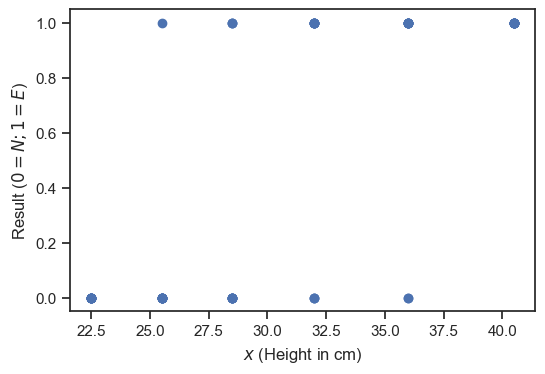

In [5]:
fig, ax = plt.subplots()
ax.plot(x, y, 'o')
ax.set_xlabel('$x$ (Height in cm)')
ax.set_ylabel('Result ($0=N; 1=E$)');

Let's train a logistic regression model with just a linear feature using scikit-learn:

In [6]:
from sklearn.linear_model import LogisticRegression

# The design matrix
X = np.hstack(
    [
        np.ones((x.shape[0], 1)),
        x[:, None]]
)

# Train the model (penalty = 'none' means that we do not add a prior on the weights)
# we are effectively just maximizing the likelihood of the data
model = LogisticRegression(
    penalty='none',
    fit_intercept=False
).fit(X, y)

Here is how you can get the trained weights of the model:

In [7]:
model.coef_

array([[-12.688,   0.411]])

And here is how you can make predictions at some arbitrary heights:

In [8]:
x_predict = np.array([10.0, 20.0, 30.0, 40.0, 50.0])
X_predict = np.hstack(
    [
        np.ones((x_predict.shape[0], 1)),
        x_predict[:, None]
    ]
)
predictions = model.predict_proba(X_predict)
predictions

array([[9.998e-01, 1.890e-04],
       [9.886e-01, 1.144e-02],
       [5.854e-01, 4.146e-01],
       [2.254e-02, 9.775e-01],
       [3.766e-04, 9.996e-01]])

Note that the model gave us back the probability of each class.
If you wanted, you could ask for the class of maximum probability for each prediction input:

In [9]:
model.predict(X_predict)

array([0, 0, 0, 1, 1])

To visualize the predictions of the model as a function of the height, we can do this:

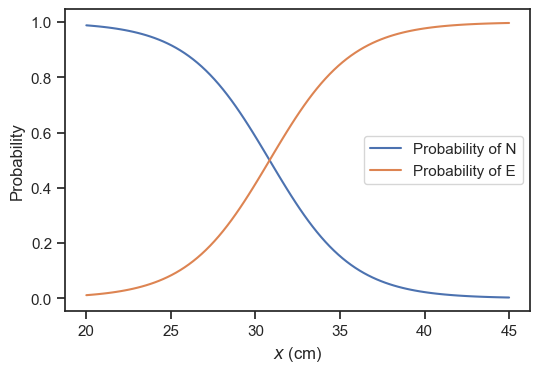

In [10]:
fig, ax = plt.subplots()
xx = np.linspace(20.0, 45.0, 100)
XX = np.hstack([np.ones((xx.shape[0], 1)), xx[:, None]])
predictions_xx = model.predict_proba(XX)
ax.plot(
    xx,
    predictions_xx[:, 0],
    label='Probability of N'
)
ax.plot(
    xx,
    predictions_xx[:, 1],
    label='Probability of E'
)
ax.set_xlabel('$x$ (cm)')
ax.set_ylabel('Probability')
plt.legend(loc='best');

## Questions

+ What is the probability of explosition when the height becomes very small?
+ What is the probability of explosition when the height becomes very large?
+ At what height it is particularly difficult to predict what is going to happen?